# AUTOCORRELATION

## WHAT IS AUTOCORRELATION ?

 Autocorrelation measures the relationship between a variable's current value and its past values. 
 
 Technical analysts can use autocorrelation to measure how much influence past prices for a security have on its future price.

## Testing for Autocorrelation

 Most common method of test autocorrelation is the Durbin-Watson test.

## Example of Autocorrelation

Relationship between Wages and Productivity in the Business Sector of the United States, 1960–2005

Y = index of real compensation per hour, business sector (1992 = 100).
X = index of output, business sector (1992 = 100).

### DATA

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\patel\Desktop\data.xlsx')
df.head()

,Year,Y,X
0,1960,60.8,48.9
1,1961,62.5,50.6
2,1962,64.6,52.9
3,1963,66.1,55.0
4,1964,67.7,56.8


## Visualisation

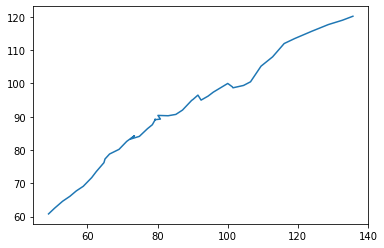

In [2]:
plt.plot(df['X'],df['Y'])

##### relationship between the real compensation and labor productivity is almost linear

## Model Fitting

In [3]:
from statsmodels.formula.api import ols
model=ols('Y ~ X',df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1830.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.72e-37
Time:                        08:12:10   Log-Likelihood:                -104.22
No. Observations:                  46   AIC:                             212.4
Df Residuals:                      44   BIC:                             216.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7419      1.394     23.487      0.000      29.932      35.551
X              0.6704      0.016     42.781      0.000       0.639       0.702
==============================================================================
Omnibus:                        6.217   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.054
Skew:                          -0.379   Prob(JB):                        0.217
Kurtosis:                       1.990   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Autocorrelation Check

#### Through Visualisation

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
data=df[['Year','df']].set_index(['Year'])
#data=df[[df]].set_index(['Year'])
plot_acf(data)

KeyError: "['df'] not in index"

## Run Test
### Hypothesis
#### H0: Runs are randomly produced Vs H1: Runs are not randomly produces

In [5]:
#Residuals
residual=model.resid

#N = total number of observations = N1 + N2
N=46

#number of + symbols (i.e., + residuals)
N1=0

#number of − symbols (i.e., − residuals)
N2=0

for i in residual:
    if i>0:
        N1=N1+1
    else: 
        N2=N2+1
        
#We now define a run as an uninterrupted sequence of one symbol or attribute, such as + or −.
R=5

#E(R)
mean=((2*N1*N2)/N)+1

#Var(R)
var=((2*N1*N2)*((2*N1*N2)-N))/(N*N*(N-1))

#Z_calculated=R-E(R)/Var(R)
Zc=abs(R-mean)/np.sqrt(var)

#Z_tabulated=R-E(R)/Var(R)
Zt=1.95

### Critical Region:
If Zcal > Ztab , We reject the null hypothesis at 5% level of significance.

### Conclusion:
Here, Zcal>Ztab.Hence,If Zcal > Ztab , We reject the null hypothesis at 5% level of significance.

### Runs are not randomly produces.

## Durbin-Watson Test
### Hypothesis
H0: No positive autocorrelation; Reject H0 if 0 < d < dL

H0: No positive autocorrelation; No decision if dL ≤ d ≤ dU

H0: No negative correlation; Reject H0 if 4 − dL < d < 4

H0: No negative correlation; No decision if No decision 4 − dU ≤ d ≤ 4 − dL

H0: No autocorrelation, positive or negative Do not reject if dU < d < 4 − dU

In [6]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

0.1738878152758224

## Critical Region
From the Durbin–Watson tables, we find that for 46 observations and one explanatory variable,

dL = 1.475

dU = 1.566

at the 5 percent level of significance.

## Conclusion
Since the computed d of 0.1738 lies below dL , we reject the hypothesis that there is no positive serial correlation in the residuals.

There is rule of thumb that if the test statistic is in between 1.5 and 2.5 then we would consider autocorrelation not be problematic in this regression model. From that we can say that autocorrelation will be problematic in this regression model.